In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


# 데이터 읽기 및 전처리

cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1.csv")
cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1.csv")
cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1.csv")
cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1.csv")

cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2.csv")
cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2.csv")
cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2.csv")
cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2.csv")

cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")

# 파일 불러오기
with open('../../data/df_postcnt_per_tag.pkl', 'rb') as f:
    df_postcnt_per_tag = pickle.load(f)


# 파일 불러오기
with open('../../data/df_postcnt_per_tag_01.pkl', 'rb') as f:
    df_postcnt_per_tag_not_calc = pickle.load(f)





In [138]:
cond_treat0_s = (df_postcnt_per_tag['cdate']>= '2021-10-06')
cond_treat0_e = (df_postcnt_per_tag['cdate']<= '2022-03-15')

cond_treat1_s = (df_postcnt_per_tag['cdate']>= '2022-10-05')
cond_treat1_e = (df_postcnt_per_tag['cdate']<= '2023-03-14')


In [139]:
cond_treat0_not_s = (df_postcnt_per_tag_not_calc['cdate']>= '2021-10-06')
cond_treat0_not_e = (df_postcnt_per_tag_not_calc['cdate']<= '2022-03-15')

cond_treat1_not_s = (df_postcnt_per_tag_not_calc['cdate']>= '2022-10-05')
cond_treat1_not_e = (df_postcnt_per_tag_not_calc['cdate']<= '2023-03-14')


df_postcnt_per_tag_not_calc

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2008-07-31,0,0,0,0,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2008-08-01,0,0,0,2,8,3,0,0,0,...,0,0,0,9,0,0,0,0,0,3
2,2008-08-02,4,0,0,2,4,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
3,2008-08-03,5,1,0,0,5,1,0,0,1,...,0,0,0,5,0,0,1,0,0,0
4,2008-08-04,3,1,0,0,10,2,0,0,1,...,0,0,0,6,0,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,2023-11-29,488,248,129,184,159,103,95,57,74,...,20,27,26,54,34,11,15,34,17,38
5600,2023-11-30,486,304,165,150,159,119,90,45,86,...,24,19,24,30,34,18,13,30,25,33
5601,2023-12-01,364,281,136,144,142,121,77,35,76,...,23,22,17,52,20,24,14,26,18,38
5602,2023-12-02,286,196,92,111,72,81,30,18,58,...,10,16,11,24,10,11,9,23,6,32


In [140]:
cond3_treat_0_1.columns[:]

Index(['cdate', 'del_yn', 'python', 'javascript', 'reactjs', 'java', 'c#',
       'html', 'r', 'pandas', 'css', 'flutter', 'sql', 'android', 'nodejs',
       'cplusplus', 'typescript', 'php', 'python_3x', 'dataframe', 'arrays',
       'angular', 'django', 'json', 'dart', 'mysql', 'c', 'excel', 'laravel',
       'swift', 'spring_boot', 'amazon_web_services', 'react_native',
       'postgresql', 'azure', 'kotlin', 'docker', 'list', 'firebase', 'ios',
       'sql_server', 'jquery', 'mongodb', 'vuejs', 'numpy', 'net', 'vba',
       'regex', 'string', 'spring', 'powershell', 'linux'],
      dtype='object')

In [141]:
# a.python_yn / a.tot              as python_yn,

' '.join(['CAST(a.'+x+'_yn AS NUMERIC)/ a.tot    as    '+x+'_yn , ' for x in cond3_treat_0_1.columns[2:]])

'CAST(a.python_yn AS NUMERIC)/ a.tot    as    python_yn ,  CAST(a.javascript_yn AS NUMERIC)/ a.tot    as    javascript_yn ,  CAST(a.reactjs_yn AS NUMERIC)/ a.tot    as    reactjs_yn ,  CAST(a.java_yn AS NUMERIC)/ a.tot    as    java_yn ,  CAST(a.c#_yn AS NUMERIC)/ a.tot    as    c#_yn ,  CAST(a.html_yn AS NUMERIC)/ a.tot    as    html_yn ,  CAST(a.r_yn AS NUMERIC)/ a.tot    as    r_yn ,  CAST(a.pandas_yn AS NUMERIC)/ a.tot    as    pandas_yn ,  CAST(a.css_yn AS NUMERIC)/ a.tot    as    css_yn ,  CAST(a.flutter_yn AS NUMERIC)/ a.tot    as    flutter_yn ,  CAST(a.sql_yn AS NUMERIC)/ a.tot    as    sql_yn ,  CAST(a.android_yn AS NUMERIC)/ a.tot    as    android_yn ,  CAST(a.nodejs_yn AS NUMERIC)/ a.tot    as    nodejs_yn ,  CAST(a.cplusplus_yn AS NUMERIC)/ a.tot    as    cplusplus_yn ,  CAST(a.typescript_yn AS NUMERIC)/ a.tot    as    typescript_yn ,  CAST(a.php_yn AS NUMERIC)/ a.tot    as    php_yn ,  CAST(a.python_3x_yn AS NUMERIC)/ a.tot    as    python_3x_yn ,  CAST(a.dataframe_yn AS 

In [142]:
# a.python_yn / a.tot              as python_yn,

' '.join([x+'_yn as '+x+', '  for x in cond3_treat_0_1.columns[2:]])

'python_yn as python,  javascript_yn as javascript,  reactjs_yn as reactjs,  java_yn as java,  c#_yn as c#,  html_yn as html,  r_yn as r,  pandas_yn as pandas,  css_yn as css,  flutter_yn as flutter,  sql_yn as sql,  android_yn as android,  nodejs_yn as nodejs,  cplusplus_yn as cplusplus,  typescript_yn as typescript,  php_yn as php,  python_3x_yn as python_3x,  dataframe_yn as dataframe,  arrays_yn as arrays,  angular_yn as angular,  django_yn as django,  json_yn as json,  dart_yn as dart,  mysql_yn as mysql,  c_yn as c,  excel_yn as excel,  laravel_yn as laravel,  swift_yn as swift,  spring_boot_yn as spring_boot,  amazon_web_services_yn as amazon_web_services,  react_native_yn as react_native,  postgresql_yn as postgresql,  azure_yn as azure,  kotlin_yn as kotlin,  docker_yn as docker,  list_yn as list,  firebase_yn as firebase,  ios_yn as ios,  sql_server_yn as sql_server,  jquery_yn as jquery,  mongodb_yn as mongodb,  vuejs_yn as vuejs,  numpy_yn as numpy,  net_yn as net,  vba_yn 

In [143]:
	# sum(x.python_yn) as python,

' '.join(['sum(x.'+x+') as '+ x+ ',  '  for x in cond3_treat_0_1.columns[2:]])

'sum(x.python) as python,   sum(x.javascript) as javascript,   sum(x.reactjs) as reactjs,   sum(x.java) as java,   sum(x.c#) as c#,   sum(x.html) as html,   sum(x.r) as r,   sum(x.pandas) as pandas,   sum(x.css) as css,   sum(x.flutter) as flutter,   sum(x.sql) as sql,   sum(x.android) as android,   sum(x.nodejs) as nodejs,   sum(x.cplusplus) as cplusplus,   sum(x.typescript) as typescript,   sum(x.php) as php,   sum(x.python_3x) as python_3x,   sum(x.dataframe) as dataframe,   sum(x.arrays) as arrays,   sum(x.angular) as angular,   sum(x.django) as django,   sum(x.json) as json,   sum(x.dart) as dart,   sum(x.mysql) as mysql,   sum(x.c) as c,   sum(x.excel) as excel,   sum(x.laravel) as laravel,   sum(x.swift) as swift,   sum(x.spring_boot) as spring_boot,   sum(x.amazon_web_services) as amazon_web_services,   sum(x.react_native) as react_native,   sum(x.postgresql) as postgresql,   sum(x.azure) as azure,   sum(x.kotlin) as kotlin,   sum(x.docker) as docker,   sum(x.list) as list,   s

In [144]:
[x+'_yn' for x in cond3_treat_0_1.columns[2:]]
# id int4 NOT NULL,
# cdate timestamp NULL,
# del_ynvarchar(2) NULL, 

['python_yn',
 'javascript_yn',
 'reactjs_yn',
 'java_yn',
 'c#_yn',
 'html_yn',
 'r_yn',
 'pandas_yn',
 'css_yn',
 'flutter_yn',
 'sql_yn',
 'android_yn',
 'nodejs_yn',
 'cplusplus_yn',
 'typescript_yn',
 'php_yn',
 'python_3x_yn',
 'dataframe_yn',
 'arrays_yn',
 'angular_yn',
 'django_yn',
 'json_yn',
 'dart_yn',
 'mysql_yn',
 'c_yn',
 'excel_yn',
 'laravel_yn',
 'swift_yn',
 'spring_boot_yn',
 'amazon_web_services_yn',
 'react_native_yn',
 'postgresql_yn',
 'azure_yn',
 'kotlin_yn',
 'docker_yn',
 'list_yn',
 'firebase_yn',
 'ios_yn',
 'sql_server_yn',
 'jquery_yn',
 'mongodb_yn',
 'vuejs_yn',
 'numpy_yn',
 'net_yn',
 'vba_yn',
 'regex_yn',
 'string_yn',
 'spring_yn',
 'powershell_yn',
 'linux_yn']

In [145]:
cond1_sede = pd.concat([cond1_treat_0_1
                    , cond1_treat_0_2
                    , cond1_treat_1_1
                    , cond1_treat_1_2], axis = 0)
cond2_sede = pd.concat([  cond2_treat_0_1
                        , cond2_treat_0_2
                        , cond2_treat_1_1
                        , cond2_treat_1_2], axis = 0)

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)

In [146]:
df_postcnt_per_tag_0 = df_postcnt_per_tag.loc[(cond_treat0_s & cond_treat0_e)]
df_postcnt_per_tag_1 = df_postcnt_per_tag.loc[(cond_treat1_s & cond_treat1_e)]

In [147]:
cond_treat0_not_s


df_postcnt_per_tag_not_calc_0 = df_postcnt_per_tag_not_calc.loc[(cond_treat0_not_s & cond_treat0_not_e)]
df_postcnt_per_tag_not_calc_1 = df_postcnt_per_tag_not_calc.loc[(cond_treat1_not_s & cond_treat1_not_e)]

In [148]:
df_postcnt_per_tag_01 = pd.concat([  df_postcnt_per_tag_0
                        , df_postcnt_per_tag_1], axis = 0)

In [149]:
df_postcnt_per_tag_not_calc_01 = pd.concat([  df_postcnt_per_tag_not_calc_0
                                            , df_postcnt_per_tag_not_calc_1], axis = 0)

In [150]:
cond3_sede.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 145
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cdate                644 non-null    object
 1   del_yn               644 non-null    int64 
 2   python               644 non-null    int64 
 3   javascript           644 non-null    int64 
 4   reactjs              644 non-null    int64 
 5   java                 644 non-null    int64 
 6   c#                   644 non-null    int64 
 7   html                 644 non-null    int64 
 8   r                    644 non-null    int64 
 9   pandas               644 non-null    int64 
 10  css                  644 non-null    int64 
 11  flutter              644 non-null    int64 
 12  sql                  644 non-null    int64 
 13  android              644 non-null    int64 
 14  nodejs               644 non-null    int64 
 15  cplusplus            644 non-null    int64 
 16  typescript   

In [151]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20


In [152]:
cond3_sede.sort_values(by = 'cdate',  ascending=True)

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
143,2021-10-06 00:00:00,1,399,309,121,186,122,107,59,33,...,14,32,19,0,16,43,12,11,13,38
153,2021-10-06 00:00:00,0,859,632,303,279,256,236,192,160,...,59,76,36,0,40,43,34,44,51,44
28,2021-10-07 00:00:00,1,379,264,93,186,118,107,52,28,...,13,19,21,0,24,36,11,19,10,38
18,2021-10-07 00:00:00,0,842,632,282,289,225,203,178,150,...,59,71,44,0,42,34,28,51,52,50
133,2021-10-08 00:00:00,0,747,601,238,262,229,209,170,160,...,46,75,35,0,34,32,29,39,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2023-03-12 00:00:00,1,215,126,61,76,55,66,16,13,...,14,8,7,0,8,10,9,4,4,19
91,2023-03-13 00:00:00,1,222,202,88,120,79,76,26,17,...,12,15,3,0,13,18,7,19,9,27
10,2023-03-13 00:00:00,0,554,376,184,211,177,153,139,69,...,36,43,20,0,34,19,19,45,35,23
74,2023-03-14 00:00:00,1,318,211,92,131,82,101,23,19,...,8,8,6,0,14,10,9,18,8,27


In [153]:
df_postcnt_per_tag_01.sort_values(by = 'cdate',  ascending=True)
df_postcnt_per_tag_not_calc_01.sort_values(by = 'cdate',  ascending=True)

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,2023-03-10,536,394,214,198,166,153,140,82,91,...,35,35,30,39,49,23,18,48,30,32
5336,2023-03-11,316,246,141,127,66,92,72,44,68,...,21,18,13,9,11,16,12,18,9,15
5337,2023-03-12,379,241,158,112,98,127,75,51,85,...,27,21,20,25,14,15,12,13,8,27
5338,2023-03-13,557,378,184,212,178,154,140,69,107,...,36,44,20,44,34,19,19,45,35,23


In [154]:
df_postcnt_per_tag_not_calc_01

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,2023-03-10,536,394,214,198,166,153,140,82,91,...,35,35,30,39,49,23,18,48,30,32
5336,2023-03-11,316,246,141,127,66,92,72,44,68,...,21,18,13,9,11,16,12,18,9,15
5337,2023-03-12,379,241,158,112,98,127,75,51,85,...,27,21,20,25,14,15,12,13,8,27
5338,2023-03-13,557,378,184,212,178,154,140,69,107,...,36,44,20,44,34,19,19,45,35,23


In [155]:
cond3_sede

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2023-01-22 00:00:00,1,237,131,61,93,49,65,15,20,...,10,9,5,0,11,16,11,7,7,19
142,2023-02-14 00:00:00,1,332,237,105,143,90,81,31,23,...,15,16,4,0,15,30,13,17,9,39
143,2023-02-17 00:00:00,1,267,177,76,102,71,95,26,30,...,10,11,11,0,6,16,7,16,4,33
144,2023-02-20 00:00:00,1,302,170,76,115,81,84,28,20,...,11,10,9,0,13,22,16,10,6,22


In [156]:
cond3_sede.head()

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43


In [157]:
cond3_sede

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2023-01-22 00:00:00,1,237,131,61,93,49,65,15,20,...,10,9,5,0,11,16,11,7,7,19
142,2023-02-14 00:00:00,1,332,237,105,143,90,81,31,23,...,15,16,4,0,15,30,13,17,9,39
143,2023-02-17 00:00:00,1,267,177,76,102,71,95,26,30,...,10,11,11,0,6,16,7,16,4,33
144,2023-02-20 00:00:00,1,302,170,76,115,81,84,28,20,...,11,10,9,0,13,22,16,10,6,22


In [158]:
cond1_sede = cond1_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond1_sede.columns[1:])
cond2_sede = cond2_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond2_sede.columns[1:])
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])

In [159]:
cond3_sede.sort_values(by = ['cdate', 'value'], ascending=[True, False])

,cdate,del_yn,variable,value
153,2021-10-06 00:00:00,0,python,859
797,2021-10-06 00:00:00,0,javascript,632
143,2021-10-06 00:00:00,1,python,399
787,2021-10-06 00:00:00,1,javascript,309
1441,2021-10-06 00:00:00,0,reactjs,303
...,...,...,...,...
31484,2023-03-14 00:00:00,1,powershell,8
27620,2023-03-14 00:00:00,1,numpy,6
11520,2023-03-14 00:00:00,1,dataframe,5
28264,2023-03-14 00:00:00,1,net,0


In [160]:
cond3_sede[cond3_sede['variable'] =='python']

,cdate,del_yn,variable,value
0,2021-10-09 00:00:00,0,python,517
1,2021-10-12 00:00:00,0,python,864
2,2021-10-15 00:00:00,0,python,756
3,2021-10-18 00:00:00,0,python,766
4,2021-11-10 00:00:00,0,python,844
...,...,...,...,...
639,2023-01-22 00:00:00,1,python,237
640,2023-02-14 00:00:00,1,python,332
641,2023-02-17 00:00:00,1,python,267
642,2023-02-20 00:00:00,1,python,302


In [161]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.melt(id_vars = ['cdate'], value_vars=df_postcnt_per_tag_01.columns[1:])
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.melt(id_vars = ['cdate'], value_vars=df_postcnt_per_tag_not_calc_01.columns[1:])

In [162]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,variable,value
0,2021-10-06,python,752
1,2021-10-07,python,718
2,2021-10-08,python,636
3,2021-10-09,python,463
4,2021-10-10,python,452


In [163]:
df_postcnt_per_tag_01

,cdate,variable,value
0,2021-10-06,python,560.51666666666666666642
1,2021-10-07,python,532.11666666666666666638
2,2021-10-08,python,461.11666666666666666640
3,2021-10-09,python,344.51666666666666666654
4,2021-10-10,python,338.44999999999999999979
...,...,...,...
16095,2023-03-10,linux,21.91666666666666666665
16096,2023-03-11,linux,11.33333333333333333333
16097,2023-03-12,linux,18.16666666666666666665
16098,2023-03-13,linux,17.83333333333333333332


In [164]:
cond1_sede['cdate'] = pd.to_datetime(cond1_sede['cdate'])
cond2_sede['cdate'] = pd.to_datetime(cond2_sede['cdate'])
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])
df_postcnt_per_tag_not_calc_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_not_calc_01['cdate'])

df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [165]:
df_postcnt_per_tag_01.head()

,cdate,variable,value
0,2021-10-06,python,560.51666666666666666642
1,2021-10-07,python,532.11666666666666666638
2,2021-10-08,python,461.11666666666666666640
3,2021-10-09,python,344.51666666666666666654
4,2021-10-10,python,338.44999999999999999979


In [166]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,variable,value
0,2021-10-06,python,752
1,2021-10-07,python,718
2,2021-10-08,python,636
3,2021-10-09,python,463
4,2021-10-10,python,452


In [167]:
cond1_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond2_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']

df_postcnt_per_tag_01.columns = ['cdate', 'tag', 'q_count']
df_postcnt_per_tag_not_calc_01.columns = ['cdate', 'tag', 'q_count']

In [168]:
cond1_sede.loc[cond1_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond2_sede.loc[cond2_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'


df_postcnt_per_tag_01.loc[df_postcnt_per_tag_01['tag'] =='net', 'tag']='.net'
df_postcnt_per_tag_not_calc_01.loc[df_postcnt_per_tag_not_calc_01['tag'] =='net', 'tag']='.net'

In [169]:
cond1_sede_y = cond1_sede.loc[cond1_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond1_sede_n = cond1_sede.loc[cond1_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]

cond2_sede_y = cond2_sede.loc[cond2_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond2_sede_n = cond2_sede.loc[cond2_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_sede_y = cond3_sede.loc[cond3_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_sede_n = cond3_sede.loc[cond3_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


In [170]:
cond1_sede_yn = cond1_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond2_sede_yn = cond2_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [171]:
cond3_sede_n

,cdate,sede_tag,sede_q_count
0,2021-10-09,python,517
1,2021-10-12,python,864
2,2021-10-15,python,756
3,2021-10-18,python,766
4,2021-11-10,python,844
...,...,...,...
32188,2023-01-22,linux,19
32189,2023-02-11,linux,20
32190,2023-02-14,linux,38
32191,2023-02-17,linux,23


In [172]:
cond3_sede_y

,cdate,sede_tag,sede_q_count
11,2021-10-28,python,363
12,2021-10-31,python,291
13,2021-11-03,python,402
14,2021-11-06,python,308
15,2021-11-26,python,322
...,...,...,...
32195,2023-01-22,linux,19
32196,2023-02-14,linux,39
32197,2023-02-17,linux,33
32198,2023-02-20,linux,22


In [173]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.groupby(['cdate', 'tag']).sum()[['q_count']].reset_index()
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.groupby(['cdate', 'tag']).sum()[['q_count']].reset_index()

In [174]:
df_postcnt_per_tag_not_calc_01

,cdate,tag,q_count
0,2021-10-06,.net,48
1,2021-10-06,amazon_web_services,64
2,2021-10-06,android,152
3,2021-10-06,angular,102
4,2021-10-06,arrays,87
...,...,...,...
16095,2023-03-14,string,14
16096,2023-03-14,swift,57
16097,2023-03-14,typescript,95
16098,2023-03-14,vba,47


In [175]:
# tt_del_n = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')
# tt_del_y = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')

In [176]:
cond1_sede

,cdate,del_yn,sede_tag,sede_q_count
0,2021-10-09,0,python,464
1,2021-10-12,0,python,738
2,2021-10-15,0,python,663
3,2021-10-18,0,python,671
4,2021-11-10,0,python,720
...,...,...,...,...
32195,2023-01-22,1,linux,25
32196,2023-02-14,1,linux,44
32197,2023-02-17,1,linux,34
32198,2023-02-20,1,linux,32


In [177]:
cond1_sede_y['cdate'] = pd.to_datetime(cond1_sede_y['cdate'])
cond1_sede_n['cdate'] = pd.to_datetime(cond1_sede_n['cdate'])
cond1_sede_yn['cdate'] = pd.to_datetime(cond1_sede_yn['cdate'])

cond2_sede_y['cdate'] = pd.to_datetime(cond2_sede_y['cdate'])
cond2_sede_n['cdate'] = pd.to_datetime(cond2_sede_n['cdate'])
cond2_sede_yn['cdate'] = pd.to_datetime(cond2_sede_yn['cdate'])

cond3_sede_y['cdate'] = pd.to_datetime(cond3_sede_y['cdate'])
cond3_sede_n['cdate'] = pd.to_datetime(cond3_sede_n['cdate'])
cond3_sede_yn['cdate'] = pd.to_datetime(cond3_sede_yn['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])
df_postcnt_per_tag_not_calc_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_not_calc_01['cdate'])


In [178]:
# treat_0_1_condition1.csv
# cast(creationdate as date) between '2021-10-06' and '2021-12-31'
# treat_0_2_condition1.csv
# cast(creationdate as date) between '2022-01-01' and '2022-03-15'
# treat_1_1_condition1.csv
# cast(creationdate as date) between '2022-10-05' and '2022-12-31'
# treat_1_2_condition1.csv
# cast(creationdate as date) between '2023-01-01' and '2023-03-14'

cond1 = cond1_sede_yn['cdate']>='2021-10-06'
cond2 = cond1_sede_yn['cdate']<='2022-03-15'
cond3 = cond1_sede_yn['cdate']>='2022-10-05'
cond4 = cond1_sede_yn['cdate']<='2023-03-14'

cond5 = cond2_sede_yn['cdate']>='2021-10-06'
cond6 = cond2_sede_yn['cdate']<='2022-03-15'
cond7 = cond2_sede_yn['cdate']>='2022-10-05'
cond8 = cond2_sede_yn['cdate']<='2023-03-14'

cond9 = cond3_sede_yn['cdate']>='2021-10-06'
cond10 = cond3_sede_yn['cdate']<='2022-03-15'
cond11 = cond3_sede_yn['cdate']>='2022-10-05'
cond12 = cond3_sede_yn['cdate']<='2023-03-14'


cond13  = cond3_sede_y['cdate']>='2021-10-06'
cond14 = cond3_sede_y['cdate']<='2022-03-15'
cond15 = cond3_sede_y['cdate']>='2022-10-05'
cond16 = cond3_sede_y['cdate']<='2023-03-14'


cond17  = cond3_sede_n['cdate']>='2021-10-06'
cond18 = cond3_sede_n['cdate']<='2022-03-15'
cond19 = cond3_sede_n['cdate']>='2022-10-05'
cond20 = cond3_sede_n['cdate']<='2023-03-14'

cond21 = df_postcnt_per_tag_01['cdate']>='2021-10-06'
cond22 = df_postcnt_per_tag_01['cdate']<='2022-03-15'
cond23 = df_postcnt_per_tag_01['cdate']>='2022-10-05'
cond24 = df_postcnt_per_tag_01['cdate']<='2023-03-14'



cond25 = df_postcnt_per_tag_not_calc_01['cdate']>='2021-10-06'
cond26 = df_postcnt_per_tag_not_calc_01['cdate']<='2022-03-15'
cond27 = df_postcnt_per_tag_not_calc_01['cdate']>='2022-10-05'
cond28 = df_postcnt_per_tag_not_calc_01['cdate']<='2023-03-14'


cond29 =  cond2_sede_y['cdate']>='2021-10-06'
cond30 = cond2_sede_y['cdate']<='2022-03-15'
cond31 = cond2_sede_y['cdate']>='2022-10-05'
cond32 = cond2_sede_y['cdate']<='2023-03-14'


cond33 = cond2_sede_n['cdate']>='2021-10-06'
cond34 = cond2_sede_n['cdate']<='2022-03-15'
cond35 = cond2_sede_n['cdate']>='2022-10-05'
cond36 = cond2_sede_n['cdate']<='2023-03-14'


In [179]:
cond3_sede_y.loc[:, :]
# .loc[(cond9&cond10),  'cdate']
# - datetime.datetime(2021,12,1)

,cdate,sede_tag,sede_q_count
11,2021-10-28,python,363
12,2021-10-31,python,291
13,2021-11-03,python,402
14,2021-11-06,python,308
15,2021-11-26,python,322
...,...,...,...
32195,2023-01-22,linux,19
32196,2023-02-14,linux,39
32197,2023-02-17,linux,33
32198,2023-02-20,linux,22


In [180]:
df_postcnt_per_tag_not_calc_01

,cdate,tag,q_count
0,2021-10-06,.net,48
1,2021-10-06,amazon_web_services,64
2,2021-10-06,android,152
3,2021-10-06,angular,102
4,2021-10-06,arrays,87
...,...,...,...
16095,2023-03-14,string,14
16096,2023-03-14,swift,57
16097,2023-03-14,typescript,95
16098,2023-03-14,vba,47


In [181]:
cond1_sede_yn.loc[(cond1&cond2), 'rel_days'] = cond1_sede_yn.loc[(cond1&cond2), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_yn.loc[(cond3&cond4), 'rel_days'] = cond1_sede_yn.loc[(cond3&cond4), 'cdate'] - datetime.datetime(2022,11,30)


cond2_sede_yn.loc[(cond5&cond6), 'rel_days'] = cond2_sede_yn.loc[(cond5&cond6), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_yn.loc[(cond7&cond8), 'rel_days'] = cond2_sede_yn.loc[(cond7&cond8), 'cdate'] - datetime.datetime(2022,11,30)

cond2_sede_y.loc[(cond29&cond30), 'rel_days'] = cond2_sede_y.loc[(cond29&cond30), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_y.loc[(cond31&cond32), 'rel_days'] = cond2_sede_y.loc[(cond31&cond32), 'cdate'] - datetime.datetime(2022,11,30)

cond2_sede_n.loc[(cond33&cond34), 'rel_days'] = cond2_sede_n.loc[(cond33&cond34), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_n.loc[(cond35&cond36), 'rel_days'] = cond2_sede_n.loc[(cond35&cond36), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_yn.loc[(cond9&cond10),  'rel_days'] = cond3_sede_yn.loc[(cond9&cond10),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_yn.loc[(cond11&cond12), 'rel_days'] = cond3_sede_yn.loc[(cond11&cond12), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_y.loc[(cond13&cond14),  'rel_days'] = cond3_sede_y.loc[(cond13&cond14),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_y.loc[(cond15&cond16), 'rel_days'] = cond3_sede_y.loc[(cond15&cond16), 'cdate'] - datetime.datetime(2022,11,30)

cond3_sede_n.loc[(cond17&cond18),  'rel_days'] = cond3_sede_n.loc[(cond17&cond18),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_n.loc[(cond19&cond20), 'rel_days'] =  cond3_sede_n.loc[(cond19&cond20), 'cdate'] - datetime.datetime(2022,11,30)



df_postcnt_per_tag_01.loc[(cond21&cond22),  'rel_days'] =  df_postcnt_per_tag_01.loc[(cond21&cond22),  'cdate'] - datetime.datetime(2021,12,1)
df_postcnt_per_tag_01.loc[(cond23&cond24),  'rel_days'] =  df_postcnt_per_tag_01.loc[(cond23&cond24), 'cdate'] - datetime.datetime(2022,11,30)

df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26),  'rel_days'] =  df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26),  'cdate'] - datetime.datetime(2021,12,1)
df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28),  'rel_days'] =  df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28), 'cdate'] - datetime.datetime(2022,11,30)



In [182]:
cond1_sede_yn.loc[(cond1&cond2), 'treat'] = 0
cond1_sede_yn.loc[(cond3&cond4), 'treat'] = 1

cond2_sede_yn.loc[(cond5&cond6), 'treat'] = 0
cond2_sede_yn.loc[(cond7&cond8), 'treat'] = 1

cond2_sede_y.loc[(cond29&cond30), 'treat'] = 0
cond2_sede_y.loc[(cond31&cond32), 'treat'] = 1

cond2_sede_n.loc[(cond33&cond34), 'treat'] = 0
cond2_sede_n.loc[(cond35&cond36), 'treat'] = 1

cond3_sede_yn.loc[(cond9&cond10), 'treat'] = 0
cond3_sede_yn.loc[(cond11&cond12), 'treat'] = 1


cond3_sede_y.loc[(cond13&cond14), 'treat'] = 0
cond3_sede_y.loc[(cond15&cond16), 'treat'] = 1

cond3_sede_n.loc[(cond17&cond18), 'treat'] = 0
cond3_sede_n.loc[(cond19&cond20), 'treat'] = 1


df_postcnt_per_tag_01.loc[(cond21&cond22), 'treat'] = 0
df_postcnt_per_tag_01.loc[(cond23&cond24), 'treat'] = 1


df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26), 'treat'] = 0
df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28), 'treat'] = 1

In [183]:
cond3_sede_n

,cdate,sede_tag,sede_q_count,rel_days,treat
0,2021-10-09,python,517,-53 days,0.0
1,2021-10-12,python,864,-50 days,0.0
2,2021-10-15,python,756,-47 days,0.0
3,2021-10-18,python,766,-44 days,0.0
4,2021-11-10,python,844,-21 days,0.0
...,...,...,...,...,...
32188,2023-01-22,linux,19,53 days,1.0
32189,2023-02-11,linux,20,73 days,1.0
32190,2023-02-14,linux,38,76 days,1.0
32191,2023-02-17,linux,23,79 days,1.0


In [184]:
cond1_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond2_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond3_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)

cond3_sede_y['rel_week'] = np.floor(cond3_sede_y['rel_days'].dt.days/7)
cond3_sede_n['rel_week'] = np.floor(cond3_sede_n['rel_days'].dt.days/7)

cond2_sede_y['rel_week'] = np.floor(cond2_sede_y['rel_days'].dt.days/7)
cond2_sede_n['rel_week'] = np.floor(cond2_sede_n['rel_days'].dt.days/7)

df_postcnt_per_tag_01['rel_week'] = np.floor(df_postcnt_per_tag_01['rel_days'].dt.days/7)
df_postcnt_per_tag_not_calc_01['rel_week'] = np.floor(df_postcnt_per_tag_not_calc_01['rel_days'].dt.days/7)


In [185]:
cond1_sede_yn[['treat', 'rel_week']] = cond1_sede_yn[['treat', 'rel_week']].astype(int)
cond2_sede_yn[['treat', 'rel_week']] = cond2_sede_yn[['treat', 'rel_week']].astype(int)
cond3_sede_yn[['treat', 'rel_week']] = cond3_sede_yn[['treat', 'rel_week']].astype(int)

cond3_sede_y[['treat', 'rel_week']] = cond3_sede_y[['treat', 'rel_week']].astype(int)
cond3_sede_n[['treat', 'rel_week']] = cond3_sede_n[['treat', 'rel_week']].astype(int)

cond2_sede_y[['treat', 'rel_week']] = cond2_sede_y[['treat', 'rel_week']].astype(int)
cond2_sede_n[['treat', 'rel_week']] = cond2_sede_n[['treat', 'rel_week']].astype(int)

df_postcnt_per_tag_01[['treat', 'rel_week']] = df_postcnt_per_tag_01[['treat', 'rel_week']].astype(int)
df_postcnt_per_tag_not_calc_01[['treat', 'rel_week']] = df_postcnt_per_tag_not_calc_01[['treat', 'rel_week']].astype(int)




In [186]:
cond3_sede_n

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-09,python,517,-53 days,0,-8
1,2021-10-12,python,864,-50 days,0,-8
2,2021-10-15,python,756,-47 days,0,-7
3,2021-10-18,python,766,-44 days,0,-7
4,2021-11-10,python,844,-21 days,0,-3
...,...,...,...,...,...,...
32188,2023-01-22,linux,19,53 days,1,7
32189,2023-02-11,linux,20,73 days,1,10
32190,2023-02-14,linux,38,76 days,1,10
32191,2023-02-17,linux,23,79 days,1,11


In [187]:
df_postcnt_per_tag_not_calc_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   cdate     16100 non-null  datetime64[ns] 
 1   tag       16100 non-null  object         
 2   q_count   16100 non-null  int64          
 3   rel_days  16100 non-null  timedelta64[ns]
 4   treat     16100 non-null  int64          
 5   rel_week  16100 non-null  int64          
dtypes: datetime64[ns](1), int64(3), object(1), timedelta64[ns](1)
memory usage: 754.8+ KB


In [188]:
# rel_week을 범주형 변수로 변환 (주차별 처리)
cond1_sede_yn['rel_week'] = pd.Categorical(cond1_sede_yn['rel_week'])
cond2_sede_yn['rel_week'] = pd.Categorical(cond2_sede_yn['rel_week'])
cond3_sede_yn['rel_week'] = pd.Categorical(cond3_sede_yn['rel_week'])

cond3_sede_y['rel_week'] = pd.Categorical(cond3_sede_y['rel_week'])
cond3_sede_n['rel_week'] = pd.Categorical(cond3_sede_n['rel_week'])

cond2_sede_y['rel_week'] = pd.Categorical(cond2_sede_y['rel_week'])
cond2_sede_n['rel_week'] = pd.Categorical(cond2_sede_n['rel_week'])


df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])


df_postcnt_per_tag_01['rel_week'] = pd.Categorical(df_postcnt_per_tag_01['rel_week'])
df_postcnt_per_tag_not_calc_01['rel_week'] = pd.Categorical(df_postcnt_per_tag_not_calc_01['rel_week'])


In [189]:
cond3_sede_y.head()

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
11,2021-10-28,python,363,-34 days,0,-5
12,2021-10-31,python,291,-31 days,0,-5
13,2021-11-03,python,402,-28 days,0,-4
14,2021-11-06,python,308,-25 days,0,-4
15,2021-11-26,python,322,-5 days,0,-1


In [190]:
# .net의 경우 데이터가 비어있어 분석에서 제외
cond1_sede_yn = cond1_sede_yn[cond1_sede_yn['sede_tag'] != '.net']
cond2_sede_yn = cond2_sede_yn[cond2_sede_yn['sede_tag'] != '.net']
cond3_sede_yn = cond3_sede_yn[cond3_sede_yn['sede_tag'] != '.net']

cond3_sede_y = cond3_sede_y[cond3_sede_y['sede_tag'] != '.net']
cond3_sede_n = cond3_sede_n[cond3_sede_n['sede_tag'] != '.net']

cond2_sede_y = cond2_sede_y[cond2_sede_y['sede_tag'] != '.net']
cond2_sede_n = cond2_sede_n[cond2_sede_n['sede_tag'] != '.net']

df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']


df_postcnt_per_tag_01 = df_postcnt_per_tag_01[df_postcnt_per_tag_01['tag'] != '.net']
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01[df_postcnt_per_tag_not_calc_01['tag'] != '.net']


In [191]:
cond3_sede_y.head()

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
11,2021-10-28,python,363,-34 days,0,-5
12,2021-10-31,python,291,-31 days,0,-5
13,2021-11-03,python,402,-28 days,0,-4
14,2021-11-06,python,308,-25 days,0,-4
15,2021-11-26,python,322,-5 days,0,-1


In [192]:
cond3_sede_y

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
11,2021-10-28,python,363,-34 days,0,-5
12,2021-10-31,python,291,-31 days,0,-5
13,2021-11-03,python,402,-28 days,0,-4
14,2021-11-06,python,308,-25 days,0,-4
15,2021-11-26,python,322,-5 days,0,-1
...,...,...,...,...,...,...
32195,2023-01-22,linux,19,53 days,1,7
32196,2023-02-14,linux,39,76 days,1,10
32197,2023-02-17,linux,33,79 days,1,11
32198,2023-02-20,linux,22,82 days,1,11


In [193]:
cond2_sede_y

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
11,2021-10-28,python,481,-34 days,0,-5
12,2021-10-31,python,353,-31 days,0,-5
13,2021-11-03,python,516,-28 days,0,-4
14,2021-11-06,python,366,-25 days,0,-4
15,2021-11-26,python,424,-5 days,0,-1
...,...,...,...,...,...,...
32195,2023-02-03,linux,25,65 days,1,9
32196,2023-02-26,linux,20,88 days,1,12
32197,2023-03-01,linux,32,91 days,1,13
32198,2023-03-04,linux,19,94 days,1,13


In [194]:
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.sort_values(by = ['tag', 'cdate'], ascending=[True, True])
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.sort_values(by = ['tag', 'cdate'], ascending=[True, True])

In [195]:
cond3_sede_n = cond3_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_y = cond3_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_yn = cond3_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [196]:
cond2_sede_n  = cond2_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond2_sede_y  = cond2_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond2_sede_yn = cond2_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [197]:
cond1_sede_yn = cond1_sede_yn.set_index(['sede_tag', 'cdate'])
cond2_sede_yn = cond2_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_sede_yn = cond3_sede_yn.set_index(['sede_tag', 'cdate'])

cond3_sede_y = cond3_sede_y.set_index(['sede_tag', 'cdate'])
cond3_sede_n = cond3_sede_n.set_index(['sede_tag', 'cdate'])


cond2_sede_y = cond2_sede_y.set_index(['sede_tag', 'cdate'])
cond2_sede_n = cond2_sede_n.set_index(['sede_tag', 'cdate'])

df_topic_day = df_topic_day.set_index(['tag', 'date'])

df_postcnt_per_tag_01 = df_postcnt_per_tag_01.set_index(['tag', 'cdate'])
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.set_index(['tag', 'cdate'])


In [198]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [199]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_yn)
cond1_result_dyn = cond1_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [200]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_yn)
cond2_result_dyn = cond2_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [201]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [202]:
df_postcnt_per_tag_01['q_count'] = df_postcnt_per_tag_01['q_count'].astype(int)
## 여쭤보기...내려도 되는지...?

In [203]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond4_mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_postcnt_per_tag_01)
cond4_result_dyn = cond4_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [204]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond5_mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_postcnt_per_tag_not_calc_01)
cond5_result_dyn = cond5_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [205]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [206]:
# 동적 효과 계수 추출
cond1_coefs = cond1_result_dyn.params
cond1_std_errors = cond1_result_dyn.std_errors
cond1_conf_int = cond1_result_dyn.conf_int()

In [207]:
# 동적 효과 계수 추출
cond2_coefs = cond2_result_dyn.params
cond2_std_errors = cond2_result_dyn.std_errors
cond2_conf_int = cond2_result_dyn.conf_int()

In [208]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [209]:
# 동적 효과 계수 추출
cond4_coefs         = cond4_result_dyn.params
cond4_std_errors    = cond4_result_dyn.std_errors
cond4_conf_int      = cond4_result_dyn.conf_int()

In [210]:
# 동적 효과 계수 추출
cond5_coefs         = cond5_result_dyn.params
cond5_std_errors    = cond5_result_dyn.std_errors
cond5_conf_int      = cond5_result_dyn.conf_int()

In [211]:
periods = np.arange(-7, 15, 1)


In [212]:
cond3_coefs

C(rel_week)[T.-8]          158.186589
C(rel_week)[T.-7]          157.895044
C(rel_week)[T.-6]          161.886297
C(rel_week)[T.-5]          154.119534
C(rel_week)[T.-4]          154.871720
C(rel_week)[T.-3]          161.067055
C(rel_week)[T.-2]          163.206997
C(rel_week)[T.-1]          158.827988
C(rel_week)[T.0]           164.064140
C(rel_week)[T.1]           155.699708
C(rel_week)[T.2]           146.705539
C(rel_week)[T.3]           123.638484
C(rel_week)[T.4]           126.102041
C(rel_week)[T.5]           154.244898
C(rel_week)[T.6]           155.857143
C(rel_week)[T.7]           163.049563
C(rel_week)[T.8]           160.040816
C(rel_week)[T.9]           163.416910
C(rel_week)[T.10]          163.620991
C(rel_week)[T.11]          167.405248
C(rel_week)[T.12]          156.822157
C(rel_week)[T.13]          156.673469
C(rel_week)[T.14]          157.274052
treat                      -14.297376
C(rel_week)[T.-7]:treat      5.379009
C(rel_week)[T.-6]:treat      0.644315
C(rel_week)[

In [213]:
cond3_coefs['C(rel_week)[T.14]:treat']
#     'C(rel_week)[T.14]:treat'

-30.562682215741216

In [214]:
coefs_filtered = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [215]:
cond1_coefs_filtered      = cond1_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_std_errors_filtered = cond1_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [216]:
cond2_coefs_filtered      = cond2_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_std_errors_filtered = cond2_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [217]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [218]:
cond4_coefs_filtered      = cond4_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond4_std_errors_filtered = cond4_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [219]:
cond5_coefs_filtered      = cond5_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond5_std_errors_filtered = cond5_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [220]:
cond5_coefs_filtered

array([ 2.31778426, -2.0058309 ,  0.29446064,  5.55393586,  1.09037901,
        1.81341108, -0.96209913, 11.38483965, 13.90962099, 11.60932945,
       11.39941691,  8.09329446,  6.11953353,  5.06705539, -1.42274052,
        0.92419825, -1.29154519, -1.        , -7.52186589, -0.87755102,
       -3.89504373, -5.62390671])

In [221]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period': periods,
    'Estimate': coefs_filtered,
    'll_95': ll_95,
    'ul_95': ul_95
})

In [222]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period': periods,
    'Estimate': coefs_filtered,
    'll_95': ll_95,
    'ul_95': ul_95
})

In [223]:
# 신뢰구간 계산
cond1_ll_95 = cond1_coefs_filtered - 1.965 * cond1_std_errors_filtered
cond1_ul_95 = cond1_coefs_filtered + 1.965 * cond1_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_coefs_filtered,
    'll_95'     : cond1_ll_95,
    'ul_95'     : cond1_ul_95
})

In [224]:
# 신뢰구간 계산
cond2_ll_95 = cond2_coefs_filtered - 1.965 * cond2_std_errors_filtered
cond2_ul_95 = cond2_coefs_filtered + 1.965 * cond2_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_coefs_filtered,
    'll_95'     : cond2_ll_95,
    'ul_95'     : cond2_ul_95
})

In [225]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})



In [226]:
# 신뢰구간 계산
cond4_ll_95 = cond4_coefs_filtered - 1.965 * cond4_std_errors_filtered
cond4_ul_95 = cond4_coefs_filtered + 1.965 * cond4_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond4_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond4_coefs_filtered,
    'll_95'     : cond4_ll_95,
    'ul_95'     : cond4_ul_95
})

In [227]:
# 신뢰구간 계산
cond5_ll_95 = cond5_coefs_filtered - 1.965 * cond5_std_errors_filtered
cond5_ul_95 = cond5_coefs_filtered + 1.965 * cond5_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond5_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond5_coefs_filtered,
    'll_95'     : cond5_ll_95,
    'ul_95'     : cond5_ul_95
})

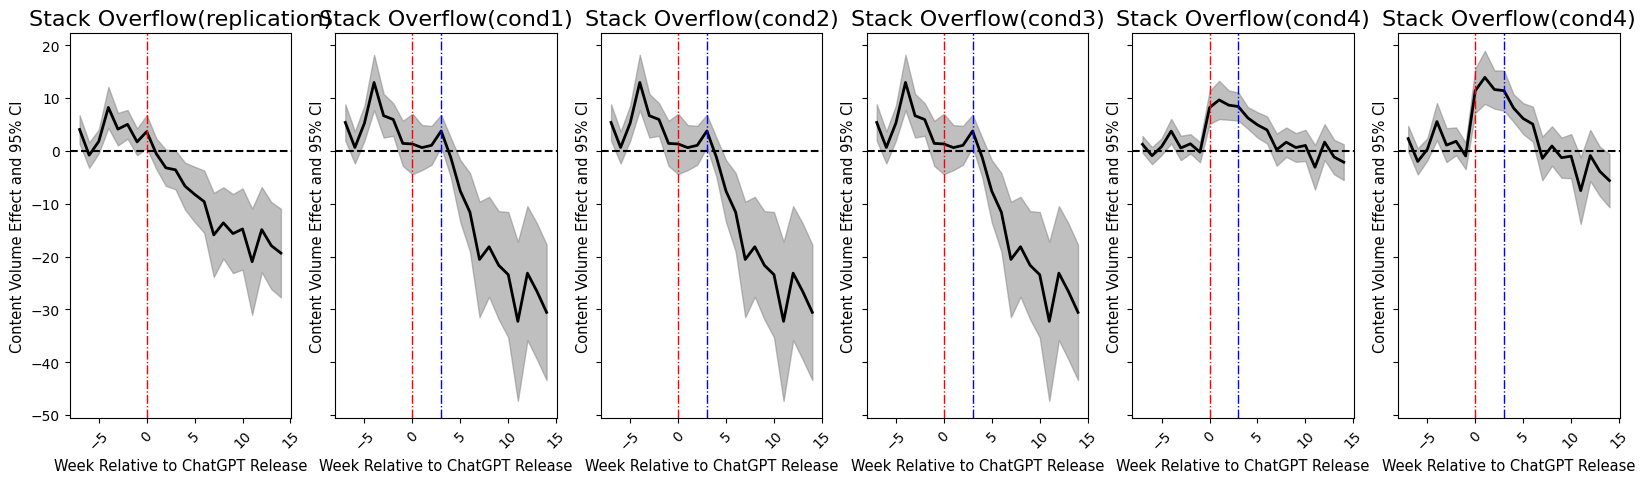

In [228]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 6, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)


axs[1].fill_between(cond1_df_coefs['period'], cond1_df_coefs['ll_95'], cond1_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond1_df_coefs['period'], cond1_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond1)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond2_df_coefs['period'], cond2_df_coefs['ll_95'], cond2_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond2_df_coefs['period'], cond2_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond2)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)


axs[4].fill_between(cond4_df_coefs['period'], cond4_df_coefs['ll_95'], cond4_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[4].plot(cond4_df_coefs['period'], cond4_df_coefs['Estimate'], color='black', linewidth=2)
axs[4].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[4].axhline(y=0, color='black', linestyle='--')
axs[4].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[4].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[4].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[4].set_title("Stack Overflow(cond4)", fontsize=16)
axs[4].tick_params(axis='x', rotation=45)
axs[4].grid(False)

axs[5].fill_between(cond5_df_coefs['period'], cond5_df_coefs['ll_95'], cond5_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[5].plot(cond5_df_coefs['period'], cond5_df_coefs['Estimate'], color='black', linewidth=2)
axs[5].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[5].axhline(y=0, color='black', linestyle='--')
axs[5].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[5].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[5].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[5].set_title("Stack Overflow(cond4)", fontsize=16)
axs[5].tick_params(axis='x', rotation=45)
axs[5].grid(False)

plt.show();

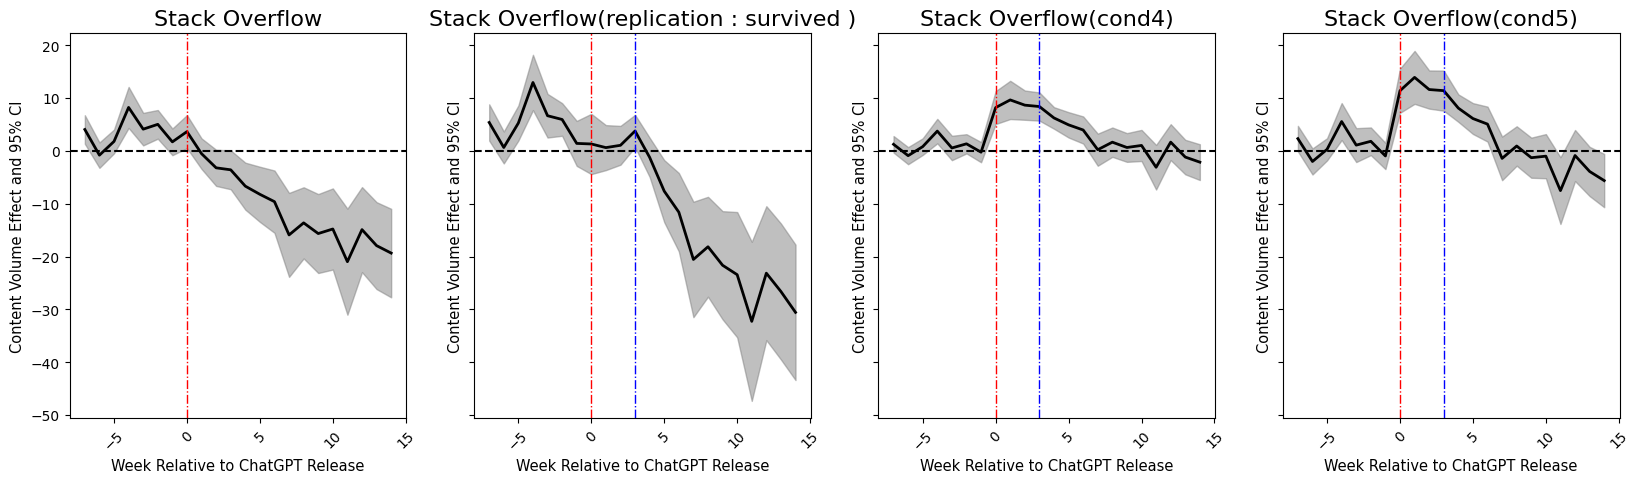

In [230]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)

axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(replication : survived )", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond4_df_coefs['period'], cond4_df_coefs['ll_95'], cond4_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond4_df_coefs['period'], cond4_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond4)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond5_df_coefs['period'], cond5_df_coefs['ll_95'], cond5_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond5_df_coefs['period'], cond5_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond5)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)

plt.show();

In [231]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [232]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_y)
cond3_y_result_dyn = cond3_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [233]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_n)
cond3_n_result_dyn = cond3_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [234]:
cond3_sede_y

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23 -56 days      0       -8
                    2021-10-07            21 -55 days      0       -8
                    2021-10-08            17 -54 days      0       -8
                    2021-10-09             9 -53 days      0       -8
                    2021-10-10             7 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            10 100 days      1       14
                    2023-03-11             8 101 days      1       14
                    2023-03-12             8 102 days      1       14
                    2023-03-13            15 103 days      1       14
                    2023-03-14             8 104 days      1       14

[15778 rows x 4 columns]

In [235]:
cond3_sede_n

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            77 -56 days      0       -8
                    2021-10-07            62 -55 days      0       -8
                    2021-10-08            70 -54 days      0       -8
                    2021-10-09            33 -53 days      0       -8
                    2021-10-10            28 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            35 100 days      1       14
                    2023-03-11            18 101 days      1       14
                    2023-03-12            21 102 days      1       14
                    2023-03-13            43 103 days      1       14
                    2023-03-14            46 104 days      1       14

[15778 rows x 4 columns]

In [236]:
# 동적 효과 계수 추출
cond3_y_coefs       = cond3_y_result_dyn.params
cond3_y_std_errors  = cond3_y_result_dyn.std_errors
cond3_y_conf_int    = cond3_y_result_dyn.conf_int()

In [237]:
# 동적 효과 계수 추출
cond3_n_coefs       = cond3_n_result_dyn.params
cond3_n_std_errors  = cond3_n_result_dyn.std_errors
cond3_n_conf_int    = cond3_n_result_dyn.conf_int()

In [238]:
cond3_y_coefs

C(rel_week)[T.-8]          49.233236
C(rel_week)[T.-7]          49.562682
C(rel_week)[T.-6]          47.545190
C(rel_week)[T.-5]          45.778426
C(rel_week)[T.-4]          45.886297
C(rel_week)[T.-3]          47.000000
C(rel_week)[T.-2]          48.017493
C(rel_week)[T.-1]          49.174927
C(rel_week)[T.0]           52.008746
C(rel_week)[T.1]           46.428571
C(rel_week)[T.2]           42.396501
C(rel_week)[T.3]           36.364431
C(rel_week)[T.4]           37.921283
C(rel_week)[T.5]           45.600583
C(rel_week)[T.6]           47.125364
C(rel_week)[T.7]           47.877551
C(rel_week)[T.8]           46.685131
C(rel_week)[T.9]           46.635569
C(rel_week)[T.10]          47.883382
C(rel_week)[T.11]          47.947522
C(rel_week)[T.12]          46.571429
C(rel_week)[T.13]          46.565598
C(rel_week)[T.14]          46.227405
treat                      -4.609329
C(rel_week)[T.-7]:treat     0.402332
C(rel_week)[T.-6]:treat     2.763848
C(rel_week)[T.-5]:treat     3.725948
C

In [239]:
cond3_n_coefs

C(rel_week)[T.-8]          108.953353
C(rel_week)[T.-7]          108.332362
C(rel_week)[T.-6]          114.341108
C(rel_week)[T.-5]          108.341108
C(rel_week)[T.-4]          108.985423
C(rel_week)[T.-3]          114.067055
C(rel_week)[T.-2]          115.189504
C(rel_week)[T.-1]          109.653061
C(rel_week)[T.0]           112.055394
C(rel_week)[T.1]           109.271137
C(rel_week)[T.2]           104.309038
C(rel_week)[T.3]            87.274052
C(rel_week)[T.4]            88.180758
C(rel_week)[T.5]           108.644315
C(rel_week)[T.6]           108.731778
C(rel_week)[T.7]           115.172012
C(rel_week)[T.8]           113.355685
C(rel_week)[T.9]           116.781341
C(rel_week)[T.10]          115.737609
C(rel_week)[T.11]          119.457726
C(rel_week)[T.12]          110.250729
C(rel_week)[T.13]          110.107872
C(rel_week)[T.14]          111.046647
treat                       -9.688047
C(rel_week)[T.-7]:treat      4.976676
C(rel_week)[T.-6]:treat     -2.119534
C(rel_week)[

In [240]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [241]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [242]:
cond3_y_coefs_filtered      = cond3_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_y_std_errors_filtered = cond3_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [243]:
cond3_n_coefs_filtered      = cond3_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_n_std_errors_filtered = cond3_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [244]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

In [245]:
# 신뢰구간 계산
cond3_y_ll_95 = cond3_y_coefs_filtered - 1.965 * cond3_y_std_errors_filtered
cond3_y_ul_95 = cond3_y_coefs_filtered + 1.965 * cond3_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_y_coefs_filtered,
    'll_95'     : cond3_y_ll_95,
    'ul_95'     : cond3_y_ul_95
})

In [246]:
# 신뢰구간 계산
cond3_n_ll_95 = cond3_n_coefs_filtered - 1.965 * cond3_n_std_errors_filtered
cond3_n_ul_95 = cond3_n_coefs_filtered + 1.965 * cond3_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_n_coefs_filtered,
    'll_95'     : cond3_n_ll_95,
    'ul_95'     : cond3_n_ul_95
})

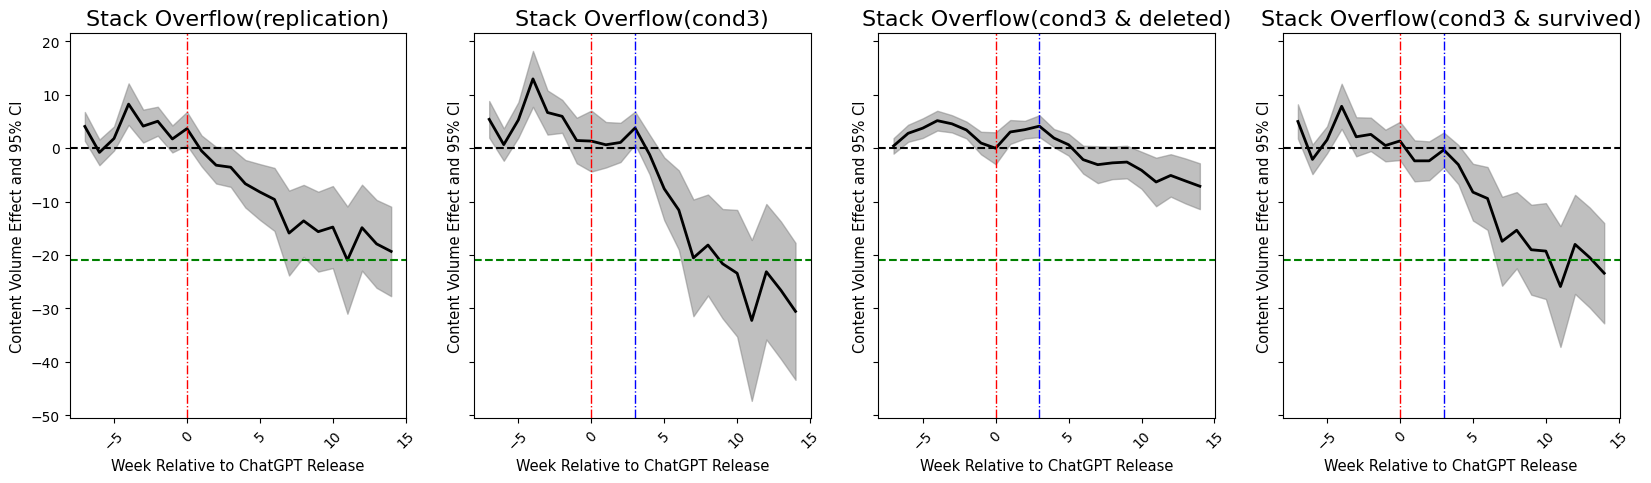

In [247]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

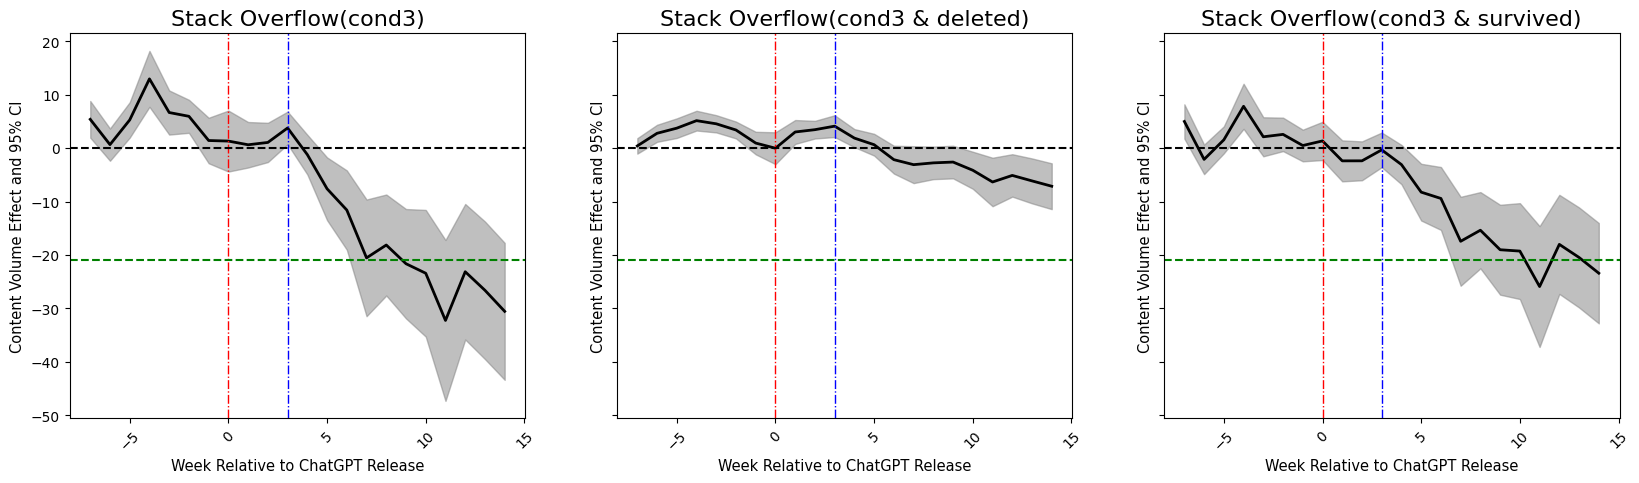

In [248]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(cond3)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)



plt.show();

In [249]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_yn)
cond2_result_dyn = cond2_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [250]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_y)
cond2_y_result_dyn = cond2_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [251]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_n)
cond2_n_result_dyn = cond2_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [252]:
cond2_sede_n.to_csv('./why.csv')

In [253]:
# 동적 효과 계수 추출
cond2_y_coefs       = cond2_y_result_dyn.params
cond2_y_std_errors  = cond2_y_result_dyn.std_errors
cond2_y_conf_int    = cond2_y_result_dyn.conf_int()

In [254]:
# 동적 효과 계수 추출
cond2_n_coefs       = cond2_n_result_dyn.params
cond2_n_std_errors  = cond2_n_result_dyn.std_errors
cond2_n_conf_int    = cond2_n_result_dyn.conf_int()

In [255]:
cond2_y_coefs

C(rel_week)[T.-8]          63.536443
C(rel_week)[T.-7]          63.102041
C(rel_week)[T.-6]          63.253644
C(rel_week)[T.-5]          60.752187
C(rel_week)[T.-4]          60.860058
C(rel_week)[T.-3]          63.402332
C(rel_week)[T.-2]          64.810496
C(rel_week)[T.-1]          64.268222
C(rel_week)[T.0]           68.376093
C(rel_week)[T.1]           62.218659
C(rel_week)[T.2]           55.845481
C(rel_week)[T.3]           47.553936
C(rel_week)[T.4]           48.577259
C(rel_week)[T.5]           59.349854
C(rel_week)[T.6]           61.029155
C(rel_week)[T.7]           63.285714
C(rel_week)[T.8]           62.309038
C(rel_week)[T.9]           63.545190
C(rel_week)[T.10]          65.379009
C(rel_week)[T.11]          65.565598
C(rel_week)[T.12]          62.935860
C(rel_week)[T.13]          62.495627
C(rel_week)[T.14]          63.265306
treat                      -4.084548
C(rel_week)[T.-7]:treat     3.072886
C(rel_week)[T.-6]:treat     2.647230
C(rel_week)[T.-5]:treat     4.979592
C

In [256]:
cond2_n_coefs

C(rel_week)[T.-8]           94.650146
C(rel_week)[T.-7]           94.793003
C(rel_week)[T.-6]           98.632653
C(rel_week)[T.-5]           93.367347
C(rel_week)[T.-4]           94.011662
C(rel_week)[T.-3]           97.664723
C(rel_week)[T.-2]           98.396501
C(rel_week)[T.-1]           94.559767
C(rel_week)[T.0]            95.688047
C(rel_week)[T.1]            93.481050
C(rel_week)[T.2]            90.860058
C(rel_week)[T.3]            76.084548
C(rel_week)[T.4]            77.524781
C(rel_week)[T.5]            94.895044
C(rel_week)[T.6]            94.827988
C(rel_week)[T.7]            99.763848
C(rel_week)[T.8]            97.731778
C(rel_week)[T.9]            99.871720
C(rel_week)[T.10]           98.241983
C(rel_week)[T.11]          101.839650
C(rel_week)[T.12]           93.886297
C(rel_week)[T.13]           94.177843
C(rel_week)[T.14]           94.008746
treat                      -10.212828
C(rel_week)[T.-7]:treat      2.306122
C(rel_week)[T.-6]:treat     -2.002915
C(rel_week)[

In [257]:
# 동적 효과 계수 추출
cond2_coefs         = cond2_result_dyn.params
cond2_std_errors    = cond2_result_dyn.std_errors
cond2_conf_int      = cond2_result_dyn.conf_int()

In [258]:
cond2_coefs_filtered      = cond2_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_std_errors_filtered = cond2_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [259]:
cond2_y_coefs_filtered      = cond2_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_y_std_errors_filtered = cond2_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [260]:
cond2_n_coefs_filtered      = cond2_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_n_std_errors_filtered = cond2_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [261]:
# 신뢰구간 계산
cond2_ll_95 = cond2_coefs_filtered - 1.965 * cond2_std_errors_filtered
cond2_ul_95 = cond2_coefs_filtered + 1.965 * cond2_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_coefs_filtered,
    'll_95'     : cond2_ll_95,
    'ul_95'     : cond2_ul_95
})

In [262]:
# 신뢰구간 계산
cond2_y_ll_95 = cond2_y_coefs_filtered - 1.965 * cond2_y_std_errors_filtered
cond2_y_ul_95 = cond2_y_coefs_filtered + 1.965 * cond2_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_y_coefs_filtered,
    'll_95'     : cond2_y_ll_95,
    'ul_95'     : cond2_y_ul_95
})

In [263]:
# 신뢰구간 계산
cond2_n_ll_95 = cond2_n_coefs_filtered - 1.965 * cond2_n_std_errors_filtered
cond2_n_ul_95 = cond2_n_coefs_filtered + 1.965 * cond2_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_n_coefs_filtered,
    'll_95'     : cond2_n_ll_95,
    'ul_95'     : cond2_n_ul_95
})

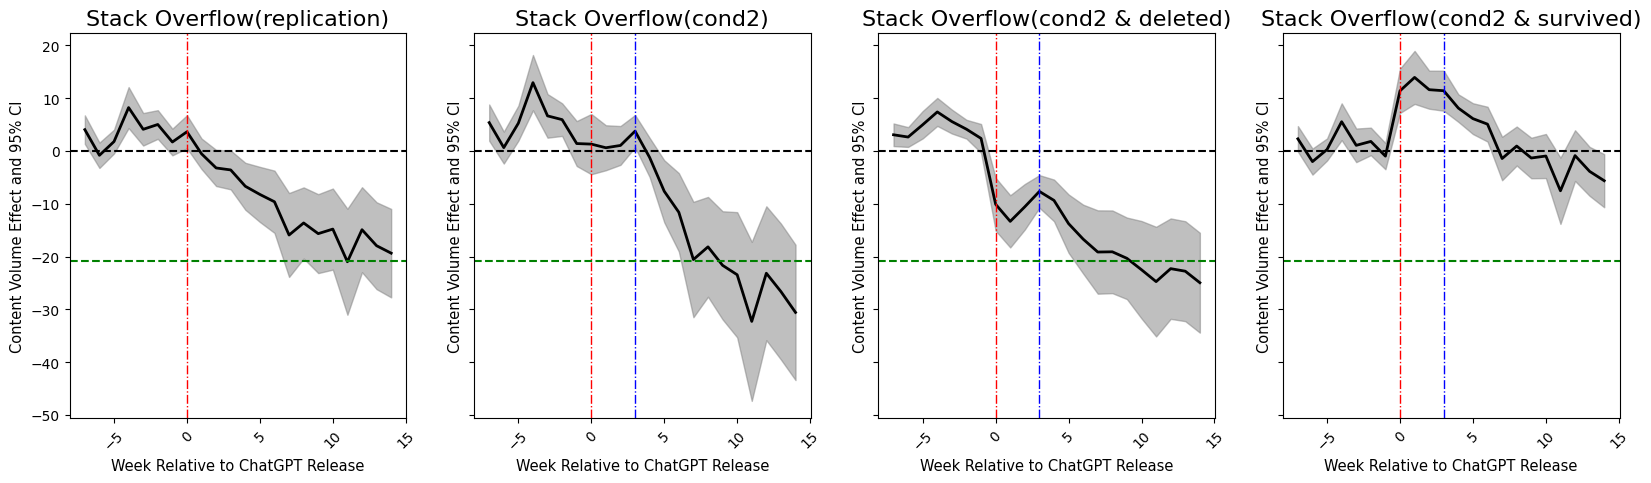

In [264]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond2_df_coefs['period'], cond2_df_coefs['ll_95'], cond2_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond2_df_coefs['period'], cond2_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond2)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond2_y_df_coefs['period'], cond2_y_df_coefs['ll_95'], cond2_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond2_y_df_coefs['period'], cond2_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond2 & deleted)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond2_n_df_coefs['period'], cond2_n_df_coefs['ll_95'], cond2_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond2_n_df_coefs['period'], cond2_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond2 & survived)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

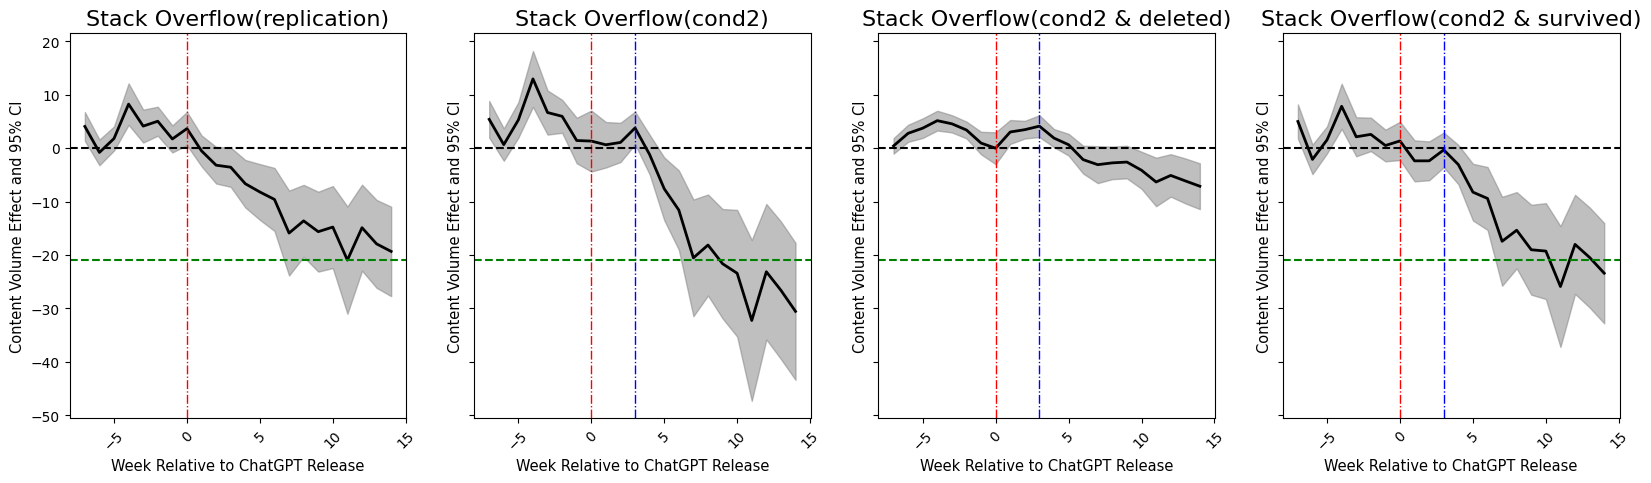

In [265]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond2)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond2 & deleted)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond2 & survived)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();